# ANALISIS DE ENCUESTA A EMPLEADOS

EL objetivo de este analisis es realizar varios procesos de extracción, carga, analisis y preparación
de datos para ser organizados y formateados para enviar al servicio de NLU Watson que se encarga de
hacer analisis de sentimiento sobre los comentarios realizados en cuatro preguntas realizadas a cada
empleado y que serán guardados en un archivo plano en una ruta compartida, donde será leido por este 
modelo para ser procesado
Las preguntas tendran cuatro categorias y son:
>¿Qué tan bien pago está su salario? = pago
>¿Qué tan eficazmente cree usted que se aprovechan sus habilidades aquí?	= habilidades
>¿Cómo siente el ambiente con su equipo de trabajo?	 = ambiente
>¿Cómo siente que en la empresa puede avanzar y desarrollarse?  = avance

Inicialmente para hacer este modelo se tomaron algunos datos del dataset ds_job.csv como empleado_id,
city y target para hacer analisis posteriores sobre lo que el modelo de predicción entregó previamente
si el empleado predice que se va a retirar (target=1)
Se llenaron datos de ejemplo de los que dieron 0 y 1 con comentarios escogidos al azar
Se procesan las columnas y preparan para enviar cada comentario a realizar analisis de sentimiento

Una mejora del modelo se puede realizar, cuando hayan mas datos de predicciones y cuando se puedan 
tener suficientes comentarios con la variable target de empleados para entrenar un modelo de lenguaje
natural para hacerlo mas cercano y preciso a la realidad de cada empresa


## Primero configuramos el servicio en IBM para que se obtengan los key y Api para conectar
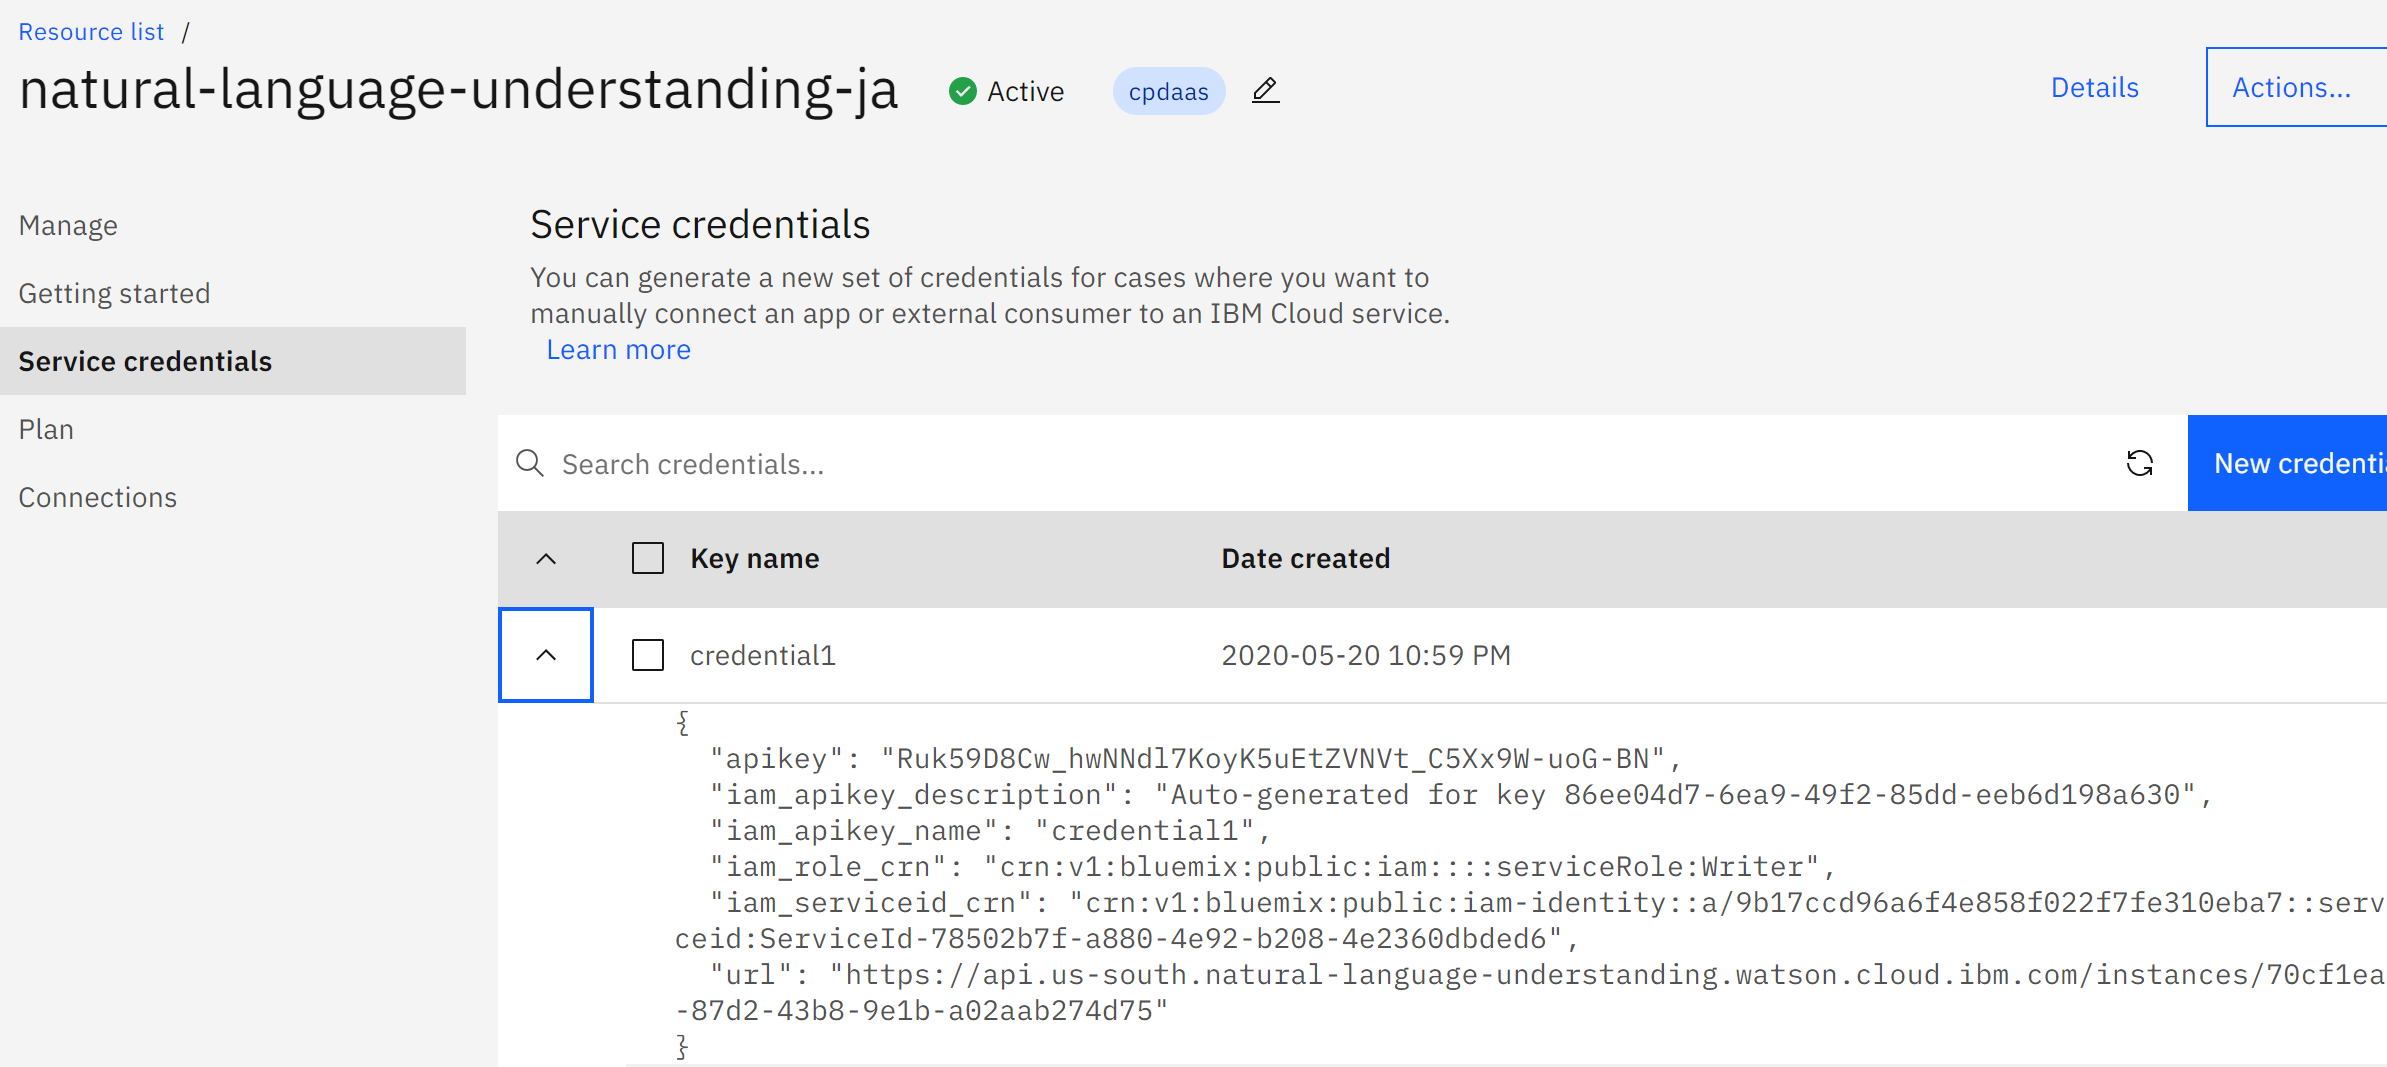

In [2]:
# Instalamos la libreria por primera vez
!pip install ibm_watson

  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-py3-none-any.whl size=375445 sha256=ef7353e3965c022be43c7a63c64729ff458985499beb3a708ce435c2cca41c77
  Stored in directory: c:\users\jjog22\appdata\local\pip\cache\wheels\e6\e5\cf\9e0c46ec51165c2a61af7f2d4fdd91df9c96071bb51264c828
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.10.0-py3-none-any.whl size=60915 sha256=9e0577ddc0b299bbdd42801d5aea32b2463dc3692af2bdb6e5d81645d13d207d
  Stored in directory: c:\users\jjog22\appdata\local\pip\cache\wheels\25\f3\b1\1da82e99b552ed44485071ba233652b9f46c06a55853eac780
Successfully built ibm-watson ibm-cloud-sdk-core


In [30]:
#Preparar las librerías para el procesamiento
import json
import ibm_watson
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, RelationsOptions,EmotionOptions
from ibm_watson.natural_language_understanding_v1 import SentimentOptions
import pandas as pd

tipo_analisis = "sentiment"
comentario_1 = "pago"
comentario_2 = "habilidades"
comentario_3 = "ambiente"
comentario_4 = "avance"
authenticator = IAMAuthenticator('Ruk59D8Cw_hwNNdl7KoyK5uEtZVNVt_C5Xx9W-uoG-BN')

In [ ]:
authenticator.token_manager.set_scope(natural_language_understanding.analyze(language='es'))

In [151]:
# Prueba del servicio para validar si no tiene problemas y si realiza los analisis requeridos
response = natural_language_understanding.analyze(
    text='Mi salario no me parece bueno',
    features=Features(sentiment=SentimentOptions())).get_result()
print(json.dumps(response, indent=2))


{
  "usage": {
    "text_units": 1,
    "text_characters": 29,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": -0.515849,
      "label": "negative"
    }
  },
  "language": "es"
}


In [72]:
# prueba con otro tipo de analisis basado en palabras
response = natural_language_understanding.analyze(
    text='no tengo buenos comentarios del ambiente de trabajo',
    language='es',
    features=Features(keywords=KeywordsOptions(sentiment=True,emotion=True,limit=2))
).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 51,
    "features": 1
  },
  "language": "es",
  "keywords": [
    {
      "text": "buenos comentarios del ambiente de trabajo",
      "sentiment": {
        "score": -0.751637,
        "label": "negative"
      },
      "relevance": 0.5,
      "count": 1
    }
  ]
}


In [114]:
# Cargamos el archivo de datos en el lugar que se está guardando por las encuestas y que trae el target de predicción del modelo de retiro

encuesta = pd.read_excel("encuesta_empleados.xls")
#print (encuesta)

In [131]:
encuesta

,empleado_id,ciudad,target,pago,habilidades,ambiente,avance
0,17465,city_10,1.0,Mi salario me parece que esta normal,Mis actividades son las que me coloca mi jefe ...,EL ambiente de trabajo es menos de lo que espe...,Podría desarrollarme con mejor capacitación y ...
1,15676,city_10,1.0,Mi salario no me parece bueno,No se aprovechan bien mis habilidades,El ambiente de trabajo no es lo que esperaba,No creo que la empresa me ayude en avanzar
2,15423,city_10,1.0,Mi salario esta por debajo del nivel pero esto...,mis habilidades en general se aprovechan en mi...,EL ambiente de trabajo es bueno,Me sirve mas patrocinio de la empresa
3,29573,city_10,1.0,MI salario es el peor que habia pensado que te...,Mis habilidades son desaprovechadas porque no ...,EL ambiente del equipo de trabajo es muy bueno...,Siento que puedo avanzar cuando echen a mi jefe
4,31080,city_10,1.0,MI salario es el mejor que habia pensado que t...,Mis habilidades estan bien aprovechadas :),EL ambiente de trabajo es super bueno,Puedo desarrollarme sin que la empresa tenga q...
5,10084,city_10,1.0,MI salario es muy bajo a lo que habia pensado ...,No tengo palabras para describirlo,El ambiente de trabajo es normal,No necesito desarrollarme para el rol que tengo
6,23415,city_10,0.0,Mi salario me parece que esta normal,Mis actividades son las que me coloca mi jefe ...,EL ambiente de trabajo es menos de lo que espe...,Podría desarrollarme con mejor capacitación y ...
7,5700,city_10,0.0,Mi salario no me parece bueno,No se aprovechan bien mis habilidades,El ambiente de trabajo no es lo que esperaba,No creo que la empresa me ayude en avanzar
8,25959,city_10,0.0,Mi salario esta por debajo del nivel pero esto...,mis habilidades en general se aprovechan en mi...,EL ambiente de trabajo es bueno,Me sirve mas patrocinio de la empresa
9,7292,city_10,0.0,MI salario es el peor que habia pensado que te...,Mis habilidades son desaprovechadas porque no ...,EL ambiente del equipo de trabajo es muy bueno...,Siento que puedo avanzar cuando echen a mi jefe


In [124]:
# Validamos unos comentarios como estan cargando y el formato que no tenga caracteres especiales
for i in encuesta.index:
       print(encuesta["pago"][i])

Mi salario me parece que esta normal
Mi salario no me parece bueno
Mi salario esta por debajo del nivel pero estoy comodo asi
MI salario es el peor que habia pensado que tendria
MI salario es el mejor que habia pensado que tendria
MI salario es muy bajo a lo que habia pensado que tendria
Mi salario me parece que esta normal
Mi salario no me parece bueno
Mi salario esta por debajo del nivel pero estoy comodo asi
MI salario es el peor que habia pensado que tendria
MI salario es el mejor que habia pensado que tendria
MI salario es muy bajo a lo que habia pensado que tendria


## Definimos una funcion para llamada al analisis de sentimiento enviandole una frase


In [140]:
# Definimos una funcion para llamada al analisis de sentimiento enviandole una frase
# que va imprimiendo cada resultado por frase que se va enviando
def nlu(texto):
    response = natural_language_understanding.analyze(
        text=texto,
        language='es',
        features=Features(sentiment=SentimentOptions())
    ).get_result()

    print(json.dumps(response, indent=2))
    return response

In [176]:
# Definimos funcion para ejecutar la carga de resultados en un dataframe jsonlist
def extrae(comentario):
    jsonlist = pd.DataFrame()
    for i in encuesta.index:
            responses = nlu(encuesta[comentario][i])

            cat=responses[tipo_analisis]
            print("cat",cat)
            listinit=pd.DataFrame({'label':[cat["document"]["label"]], 'score':[cat["document"]["score"]]})
            print(listinit)
            jsonlist=jsonlist.append(listinit )
    return jsonlist

In [181]:
# cargamos en dataframes las cuatro categorias de sentimiento que llaman a su vez la construccion de cada lista de resultados 
# por comentario y frase
sentimiento_1 = pd.DataFrame()
sentimiento_2 = pd.DataFrame()
sentimiento_3 = pd.DataFrame()
sentimiento_4 = pd.DataFrame()
sentimiento_1 = extrae(comentario_1)
sentimiento_2 = extrae(comentario_2)
sentimiento_3 = extrae(comentario_3)
sentimiento_4 = extrae(comentario_4)

{
  "usage": {
    "text_units": 1,
    "text_characters": 36,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": 0,
      "label": "neutral"
    }
  },
  "language": "es"
}
cat {'document': {'score': 0, 'label': 'neutral'}}
     label  score
0  neutral      0
{
  "usage": {
    "text_units": 1,
    "text_characters": 29,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": -0.515849,
      "label": "negative"
    }
  },
  "language": "es"
}
cat {'document': {'score': -0.515849, 'label': 'negative'}}
      label     score
0  negative -0.515849
{
  "usage": {
    "text_units": 1,
    "text_characters": 58,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": 0.862802,
      "label": "positive"
    }
  },
  "language": "es"
}
cat {'document': {'score': 0.862802, 'label': 'positive'}}
      label     score
0  positive  0.862802
{
  "usage": {
    "text_units": 1,
    "text_characters": 51,
    "features": 1
  },
  "sentiment": 

## construir el dataframe unido de los resultados de los cuatro resultados en sentimiento para cada comentario


In [213]:
# construir el dataframe unido de los resultados de los cuatro resultados en sentimiento para cada comentario
sentimiento_1.reset_index(drop=True, inplace=True)
sentimiento_2.reset_index(drop=True, inplace=True)
sentimiento_3.reset_index(drop=True, inplace=True)
sentimiento_4.reset_index(drop=True, inplace=True)
encuesta["score1"] = sentimiento_1["score"]
encuesta["score2"] = sentimiento_2["score"]
encuesta["score3"] = sentimiento_3["score"]
encuesta["score4"] = sentimiento_4["score"]
encuesta

,empleado_id,ciudad,target,pago,habilidades,ambiente,avance,score1,score2,score3,score4
0,17465,city_10,1.0,Mi salario me parece que esta normal,Mis actividades son las que me coloca mi jefe ...,EL ambiente de trabajo es menos de lo que espe...,Podría desarrollarme con mejor capacitación y ...,0.000000,0.239570,-0.432633,0.834773
1,15676,city_10,1.0,Mi salario no me parece bueno,No se aprovechan bien mis habilidades,El ambiente de trabajo no es lo que esperaba,No creo que la empresa me ayude en avanzar,-0.515849,0.343540,-0.688861,-0.695628
2,15423,city_10,1.0,Mi salario esta por debajo del nivel pero esto...,mis habilidades en general se aprovechan en mi...,EL ambiente de trabajo es bueno,Me sirve mas patrocinio de la empresa,0.862802,-0.293774,0.878586,0.000000
3,29573,city_10,1.0,MI salario es el peor que habia pensado que te...,Mis habilidades son desaprovechadas porque no ...,EL ambiente del equipo de trabajo es muy bueno...,Siento que puedo avanzar cuando echen a mi jefe,-0.836226,-0.897662,0.966150,-0.586573
4,31080,city_10,1.0,MI salario es el mejor que habia pensado que t...,Mis habilidades estan bien aprovechadas :),EL ambiente de trabajo es super bueno,Puedo desarrollarme sin que la empresa tenga q...,0.000000,0.842504,0.989277,-0.569463
5,10084,city_10,1.0,MI salario es muy bajo a lo que habia pensado ...,No tengo palabras para describirlo,El ambiente de trabajo es normal,No necesito desarrollarme para el rol que tengo,0.000000,-0.835882,0.000000,0.000000
6,23415,city_10,0.0,Mi salario me parece que esta normal,Mis actividades son las que me coloca mi jefe ...,EL ambiente de trabajo es menos de lo que espe...,Podría desarrollarme con mejor capacitación y ...,0.000000,0.239570,-0.432633,0.834773
7,5700,city_10,0.0,Mi salario no me parece bueno,No se aprovechan bien mis habilidades,El ambiente de trabajo no es lo que esperaba,No creo que la empresa me ayude en avanzar,-0.515849,0.343540,-0.688861,-0.695628
8,25959,city_10,0.0,Mi salario esta por debajo del nivel pero esto...,mis habilidades en general se aprovechan en mi...,EL ambiente de trabajo es bueno,Me sirve mas patrocinio de la empresa,0.862802,-0.293774,0.878586,0.000000
9,7292,city_10,0.0,MI salario es el peor que habia pensado que te...,Mis habilidades son desaprovechadas porque no ...,EL ambiente del equipo de trabajo es muy bueno...,Siento que puedo avanzar cuando echen a mi jefe,-0.836226,-0.897662,0.966150,-0.586573


## Formatear en df para preparar los datos en los reportes que se utilizarán de promedio de score en cada sentimiento


In [216]:
# Formatear en df para preparar los datos en los reportes que se utilizarán de promedio de score en cada sentimiento
# los score negativos indican negatividad
# los score positivos indican que la respuesta tiene buen sentimiento en esa categoria
# los score en cero indican neutralidad
df=encuesta.melt(id_vars=['empleado_id','ciudad','target','pago','habilidades','ambiente','avance'])

## Generar reporte global para ver la tendencia que reporta el sentimiento vs la prediccion

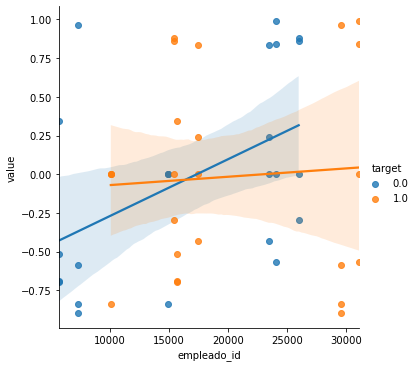

In [223]:
import seaborn as sns
sns.lmplot(x='empleado_id',y='value',data=df,hue='target')

## Se muestra un hecho importante en los score graficos que demuestran:

> Los que se predicen a retirar muestran un sentimiento en tendencia neutra a negativa

> Los que se preducen no a retirar muestran un sentimiento en tendencia positiva que confirmaria su agrado con el cargo

> Los puntos mas negativos muestran tanto los que se predicen a retiro como los que no, lo cual puede indicar que las respuestas
 no han sido sinceras o que la prediccion pudo ser un falso negativo, pero podria analizarse por recurso humano en los dos casos

# Vamos a calcular un promedio de los score de los 4 casos de sentimiento para los empleados
# vamos a graficar cual es el score geenral para cada empleado para entender mejor los resultados de analisis

In [287]:
df1=df.filter(['empleado_id','value'])
df2=pd.DataFrame(df1.groupby(['empleado_id']).agg({'value':['mean']}).reset_index())
df2.columns = ['empleado','prom_sentim']

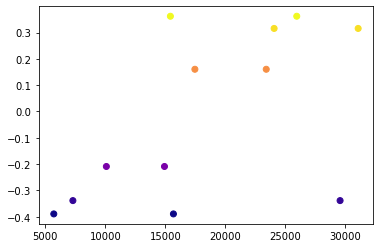

In [291]:
import matplotlib.pyplot as plt
plt.scatter(x=df2['empleado'], y=df2['prom_sentim'], c=df2['prom_sentim'], cmap='plasma')

# se podria continuar con analisis como los empleados que salen con un promedio menor que cero estan insatisfechos